<a href="https://colab.research.google.com/github/Nancy-Amr/Computer-Vision-Project/blob/main/vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless


Saving SaltPepper.jpg to SaltPepper (1).jpg


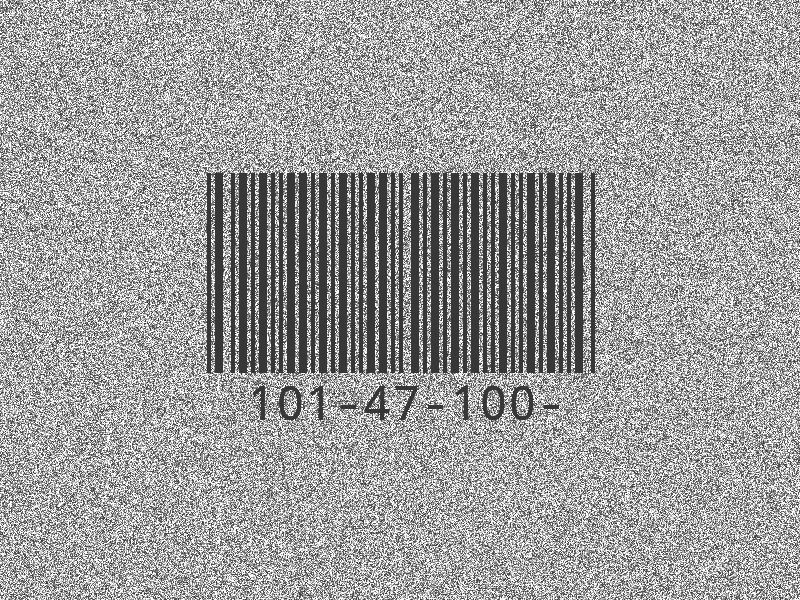

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt

uploaded = files.upload()
image = cv2.imread("SaltPepper.jpg")
cv2_imshow(image)

(600, 800)


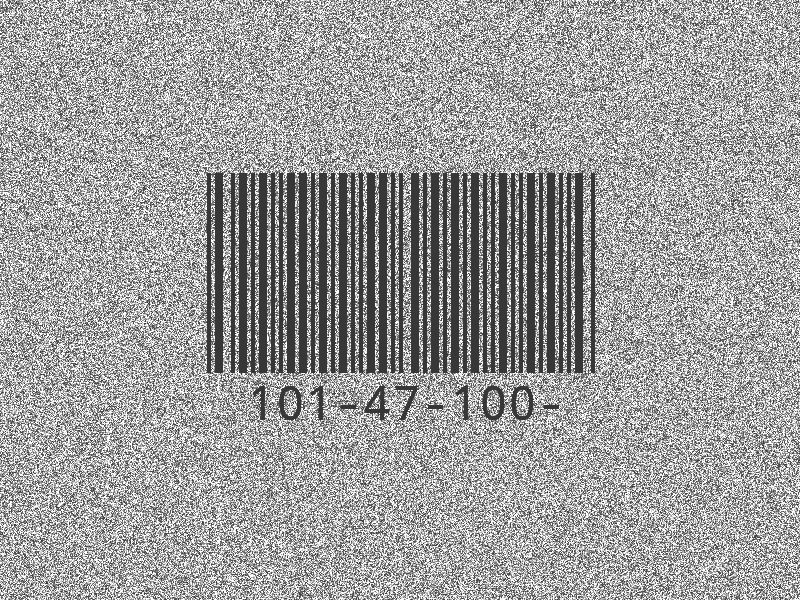

In [ ]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
cv2_imshow(img_gray)

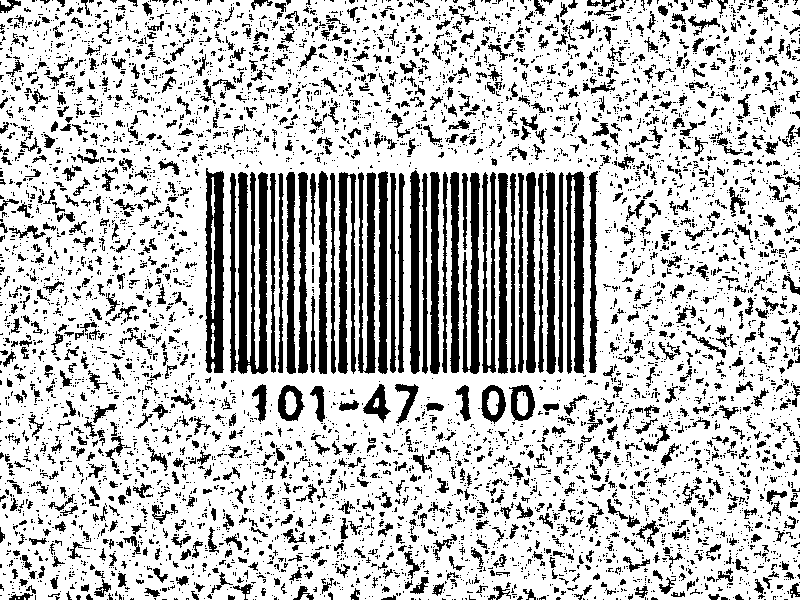

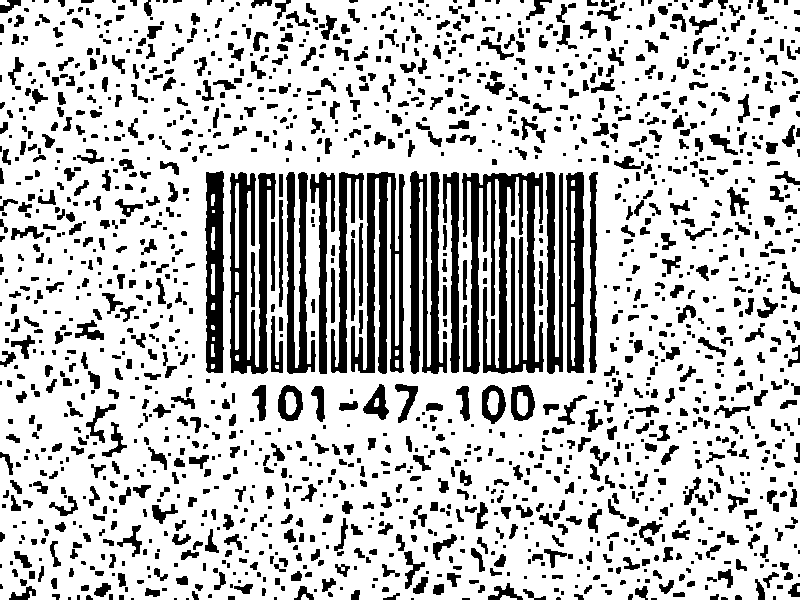

In [ ]:

def Remove_Salt_Pepper(img_gray):
    # Step 1: Apply Median Blur to remove salt and pepper noise
    blurred_image = cv2.medianBlur(img_gray, 5)

    # Step 2: Adaptive Thresholding to highlight the barcode
    thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 21)
    return thresh
processed_img = Remove_Salt_Pepper(img_gray)
cv2_imshow(processed_img)

def open_close(img_gray):
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
    closing1 = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    opening1 = cv2.morphologyEx(closing1, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening1, cv2.MORPH_CLOSE, kernel)
    return closing
processed_img = open_close(processed_img)
cv2_imshow(processed_img)


# def unsharp_mask(image, sigma=1.0, strength=1.5):
#     # Apply Gaussian blur
#     blurred = cv2.GaussianBlur(image, (0, 0), sigma)
#     # Subtract the blurred image from the original
#     sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
#     return sharpened
# sharpened_image = unsharp_mask(img_gray)
# cv2_imshow(sharpened_image)

# # Apply unsharp masking
# sharpened_image = unsharp_mask(image)
# # Save the result
# cv2.imwrite('sharpened_image.jpg', sharpened_image)


# def cropped_image(image):
#     # Find contours in the thresholded image
#   contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#   # Find the largest contour (assuming it's the barcode)
#   largest_contour = max(contours, key=cv2.contourArea)

#   # Get the rotated bounding box of the largest contour
#   rect = cv2.minAreaRect(largest_contour)

#   box = cv2.boxPoints(rect)
#   box = np.int32(box)

#   # Find the minimum enclosing rectangle
#   x, y, w, h = cv2.boundingRect(box)

#   # Crop the image to the bounding rectangle
#   cropped_image = image[y:y+h, x:x+w]
#   return cropped_image

# cropped_image = cropped_image(processed_img)
# cv2_imshow(cropped_image)
